In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
from matplotlib.colors import ListedColormap

In [59]:
# Load dataset
df = pd.read_csv('brain_tumor_dataset.csv')

In [60]:
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           20000 non-null  int64  
 1   Age                  20000 non-null  int64  
 2   Gender               20000 non-null  object 
 3   Tumor_Type           20000 non-null  object 
 4   Tumor_Size           20000 non-null  float64
 5   Location             20000 non-null  object 
 6   Histology            20000 non-null  object 
 7   Stage                20000 non-null  object 
 8   Symptom_1            20000 non-null  object 
 9   Symptom_2            20000 non-null  object 
 10  Symptom_3            20000 non-null  object 
 11  Radiation_Treatment  20000 non-null  object 
 12  Surgery_Performed    20000 non-null  object 
 13  Chemotherapy         20000 non-null  object 
 14  Survival_Rate        20000 non-null  float64
 15  Tumor_Growth_Rate    20000 non-null 

Patient_ID             0
Age                    0
Gender                 0
Tumor_Type             0
Tumor_Size             0
Location               0
Histology              0
Stage                  0
Symptom_1              0
Symptom_2              0
Symptom_3              0
Radiation_Treatment    0
Surgery_Performed      0
Chemotherapy           0
Survival_Rate          0
Tumor_Growth_Rate      0
Family_History         0
MRI_Result             0
Follow_Up_Required     0
dtype: int64

In [61]:
# Encode categorical variables
label_encoders = {}
categorical_cols = df.select_dtypes(include=["object"]).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [62]:

# Selecting two features for visualization
feature_1, feature_2 = "Tumor_Size", "Tumor_Growth_Rate"
X = df[[feature_1, feature_2]]

In [63]:
# Splitting features and target
X = df.drop(columns=["Tumor_Type", "Survival_Rate"])

# Classification task
y_classification = df["Tumor_Type"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_classification, test_size=0.2, random_state=42)

# Regression task
y_regression = df["Survival_Rate"]
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [72]:
# Standardizing numerical features for model training
scaler_full = StandardScaler()
X_train_c_full = scaler_full.fit_transform(df.drop(columns=["Tumor_Type", "Survival_Rate"]))
X_test_c_full = scaler_full.transform(df.drop(columns=["Tumor_Type", "Survival_Rate"]))

In [73]:
# Standardizing only selected features for visualization
scaler_vis = StandardScaler()
X_train_c = scaler_vis.fit_transform(X_train_c)
X_test_c = scaler_vis.transform(X_test_c)
X_train_r = scaler_vis.fit_transform(X_train_r)
X_test_r = scaler_vis.transform(X_test_r)


In [74]:
# SVM Classification Model
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_c, y_train_c)

SVC(kernel='linear')

In [75]:
y_pred_c = svm_classifier.predict(X_test_c)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.50      1997
           1       0.51      0.51      0.51      2003

    accuracy                           0.51      4000
   macro avg       0.51      0.51      0.51      4000
weighted avg       0.51      0.51      0.51      4000



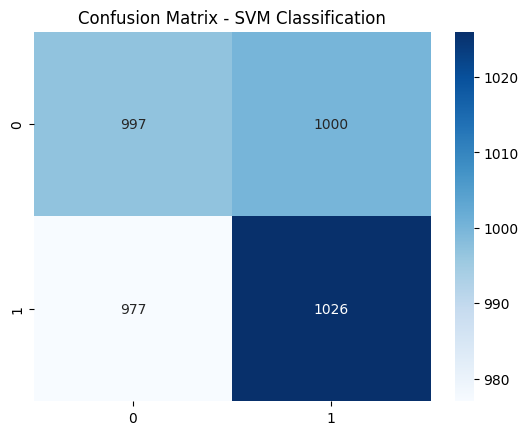

In [76]:


# Evaluate Classification
print("SVM Classification Report:\n", classification_report(y_test_c, y_pred_c))
sns.heatmap(confusion_matrix(y_test_c, y_pred_c), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - SVM Classification")
plt.show()


In [77]:
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_r, y_train_r)


SVR(kernel='linear')

In [78]:
y_pred_r = svm_regressor.predict(X_test_r)

In [79]:
# Evaluate Regression
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("RMSE:", np.sqrt(mean_squared_error(y_test_r, y_pred_r)))
print("R2 Score:", r2_score(y_test_r, y_pred_r))

MSE: 295.59096413855616
RMSE: 17.19275906126053
R2 Score: -0.0020078378513557205


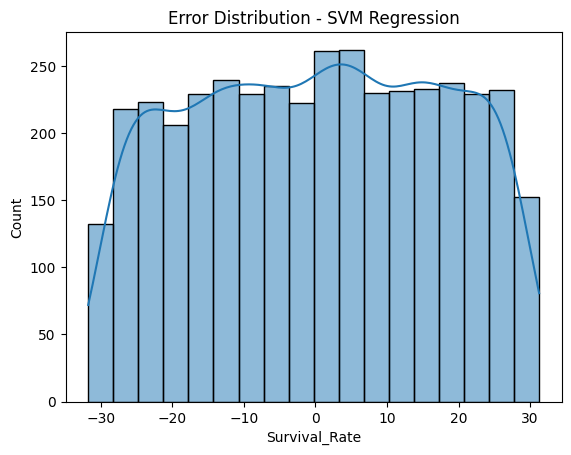

In [82]:
# Plot error distribution
sns.histplot(y_test_r - y_pred_r, kde=True)
plt.title("Error Distribution - SVM Regression")
plt.show()